# Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Load Data

In [2]:
avocados = pd.read_csv('/Users/britfathi/Downloads/avocados.csv')

In [3]:
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [24]:
#### Getting only the needed regions, and putting it in a new dataframe

regions1 = ['Indianapolis', 'Orlando', 'PhoenixTucson']

In [25]:
data1 = avocados["region"].isin(regions1)

In [26]:
data2 = avocados[data1].copy()

In [27]:
data2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,Indianapolis
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,Indianapolis
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,Indianapolis
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,Indianapolis
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,Indianapolis


In [28]:
data2.region.value_counts()

Indianapolis     338
Orlando          338
PhoenixTucson    338
Name: region, dtype: int64

## Recode this categorical data

In [29]:
dict = {'Indianapolis' : 0, 'Orlando' : 1, 'PhoenixTucson': 2}

In [30]:
data2['region'] = data2.region.replace(dict)

In [31]:
data2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,0
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,0
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,0
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,0
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,0


In [32]:
data2.region.value_counts()

0    338
1    338
2    338
Name: region, dtype: int64

#### Still the same number. Seems to have worked. 

# Test Assumptions

## Test Normality

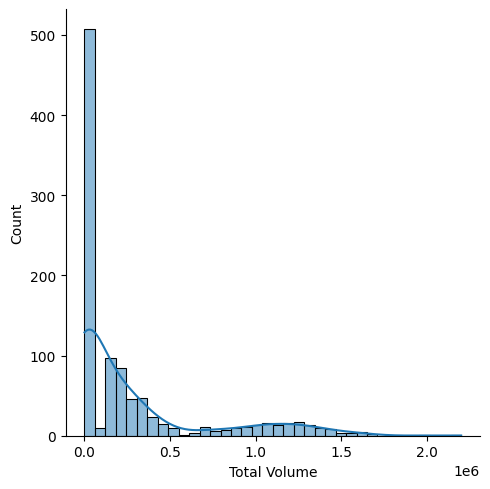

In [35]:
sns.displot(data2['Total Volume'], kde = True)
## super postiviely skewed. Square root? 

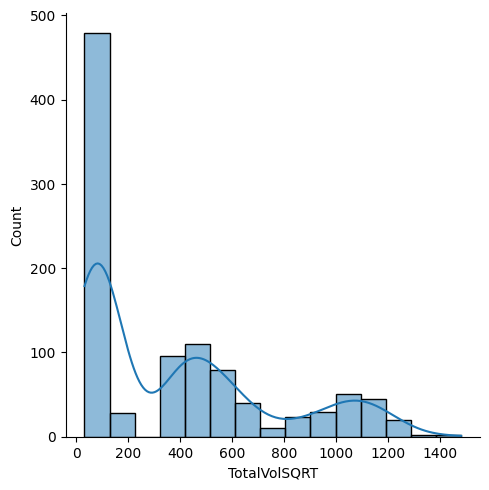

In [36]:
data2['TotalVolSQRT'] = np.sqrt(data2["Total Volume"])

sns.displot(data2['TotalVolSQRT'], kde = True)

## It's a roller coaster! Also not what we want. Log?

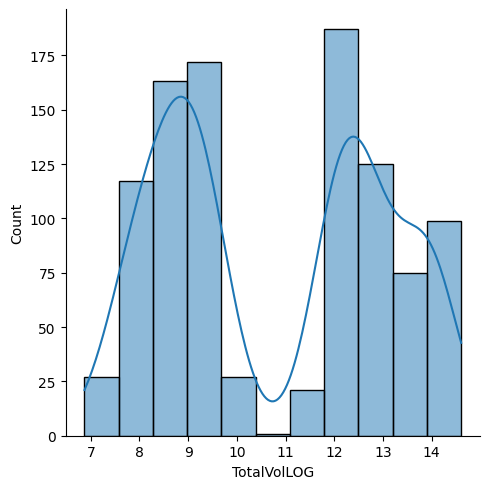

In [37]:
data2['TotalVolLOG'] = np.log(data2["Total Volume"])

sns.displot(data2['TotalVolLOG'], kde = True)
## An even more thrilling rollercoaster ride. This looks bimodal... but I don't know what to do with that yet. 

## Test Homogeneity of Variance

In [38]:
scipy.stats.bartlett(data2["TotalVolLOG"], data2["region"])

BartlettResult(statistic=883.7919675933721, pvalue=3.2755760094735546e-194)

#### This is significant and therefore violates the assumption of homogeneity of variance

## ANOVA (ignoring that it did not meet the homogeneity of variance)

In [40]:
stats.f_oneway(avocados["Total Volume"][avocados["region"]=="Indianapolis"],
              avocados["Total Volume"][avocados["region"]=="Orlando"],
              avocados["Total Volume"][avocados["region"]=="PhoenixTucson"])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

With a p-value with an e of -65, there is a significant difference between the total volume in each of those regions. 

## Post Hoc: How different is the total volume from those regions?

In [44]:
postHoc= MultiComparison(data2['TotalVolLOG'], data2["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4766    0.0 1.0898 1.8634   True
     1      2   1.0474    0.0 0.6606 1.4342   True
--------------------------------------------------


#### All have a reject the null hypothesis (that they are the same). 

In [47]:
data3 = data2[["region", "Total Volume"]]

In [48]:
data3.groupby("region").mean()

,Total Volume
region,
0,89536.661036
1,173552.378373
2,578826.368343


### All of the volumes are different. The PhoenixTucson had the highest volume (about 4 times larger than Orlando). Indianapolis had the least total volume (about half of Orlando). 